In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import copy
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 9)

In [1]:
beta = 3
alpha = 1
learning_rate = 1
epslon = 0.0001

In [10]:
df = pd.read_csv('./datasets/CampusBasin/dataset.csv', index_col=0)
del df['Microscopic - Sorting:']
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [11]:
km = AgglomerativeClustering(n_clusters=12)

In [12]:
silhouette = silhouette_score(X, km.fit_predict(X))
target_silhouette = silhouette * beta
print(f'Initial_silhouette = {silhouette}')
print(f'beta = {beta}')
print(f'Target_silhouette * beta = {target_silhouette}')

Initial_silhouette = 0.352401028977685
beta = 3
Target_silhouette * beta = 1.0572030869330549


In [13]:
internal_df = copy.deepcopy(df)
alphas = [alpha]
silhouettes = [silhouette]

count_loop = 0
while silhouette < target_silhouette:
    count_loop += 1
    alpha += learning_rate
    internal_df['Main/single size mode(mm):'] = df['Main/single size mode(mm):']*alpha
    X = internal_df.iloc[:,:-1].values
    y = km.fit_predict(X)
    silhouette = silhouette_score(X, y)
    alphas += [alpha]
    silhouettes += [silhouette]
    
    if count_loop > 10000:
        print('Breaking!')
        break

print(f'Alpha = {alpha}')
print(f'Silhouette = {silhouette}')

Breaking!
Alpha = 10002
Silhouette = 0.642424178206764


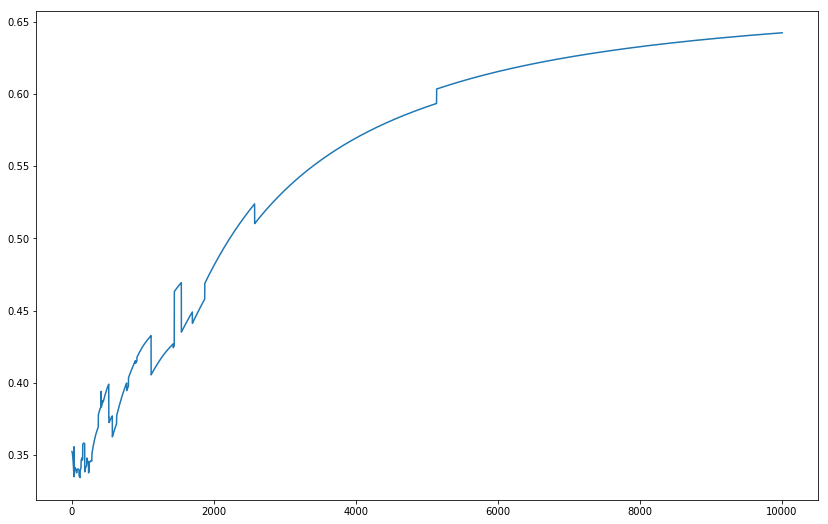

In [14]:
plt.plot(alphas, silhouettes)

In [9]:
df['Main/single size mode(mm):'] = df['Main/single size mode(mm):']*alpha

In [10]:
df.to_csv('test.csv')